In [137]:
import wptools
import random
import pickle
import datetime
import matplotlib.pyplot as plt

In [87]:
cat = wptools.category('Category:2019_deaths')
cat.get_members()

en.wikipedia.org (categorymembers) Category:2019_deaths
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:2019_deaths (&cmconti...
en.wikipedia.org (categorymembers) Category:201

In [176]:
print(len(cat.data['members']))
cat.data['members'][15:20]


8126


[{'pageid': 61779755, 'ns': 0, 'title': 'A.K.Subbaiah'},
 {'pageid': 39563088, 'ns': 0, 'title': 'Jane Aamund'},
 {'pageid': 62843632, 'ns': 0, 'title': 'Jüri Aarma'},
 {'pageid': 60238842, 'ns': 0, 'title': 'Sveinung Aarnseth'},
 {'pageid': 20317651, 'ns': 0, 'title': 'Chester Aaron'}]

In [177]:
%%capture
pages=[]
for i in range(2000):
    page=wptools.page(pageid=cat.data['members'][random.randrange(0,2000)]['pageid'],timeout=0)
    page.get_parse()
    if(page.data.get('infobox') and 
       page.data['infobox'].get('birth_date') and 
       page.data['infobox'].get('death_date')):
        pages.append((page.data['infobox'].get('birth_date'), page.data['infobox'].get('death_date')))

with open("data_0-2000.txt", "wb") as fp:
    pickle.dump(pages, fp)
    

In [182]:
with open("data_0-2000.txt", "rb") as fp:  
    pages = pickle.load(fp)

In [194]:
def parser(birth,death):
    if(birth.lower().find("birth date")!=-1 and death.lower().find("death date")!=-1):
        birth=list(filter(lambda x:x!='',
                     ''.join(list(filter(lambda x:x.isdigit() or x=="|",birth))).split("|")))[0:3]
        death=list(filter(lambda x:x!='',
                     ''.join(list(filter(lambda x:x.isdigit() or x=="|",death))).split("|")))[0:3]
        try:
            return (datetime.date(*map(int,birth)),datetime.date(*map(int,death)))
        except ValueError:
            return None
        except TypeError:
            print(birth,death)
    return None

In [195]:
dates=list(filter(lambda x:x is not None,map(lambda page:parser(page[0], page[1]),pages)))  

print(len(pages),len(dates))
distanse_dates=list(map(lambda date:((date[0]-datetime.date(date[0].year,1,1))-
                                   (date[1]-datetime.date(date[1].year,1,1))).days,dates))
def circle(x):
    if(x>182):
        return -364+x
    if(x<-182):
        return 364+x
    return x
distanse_dates=list(map(circle,distanse_dates))
#print(distanse_dates)

1306 1021


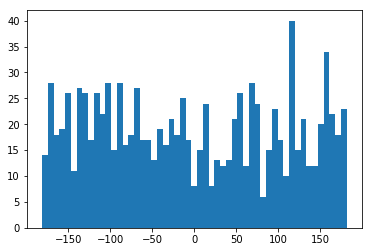

In [197]:
plt.hist(distanse_dates,bins=53)
plt.show()